<a href="https://colab.research.google.com/github/lnpetrova/comp_ling/blob/master/cl_hw5_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Установка BigARTM

In [1]:
!apt-get --yes install git make cmake build-essential libboost-all-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
make is already the newest version (4.1-9.1ubuntu1).
make set to manually installed.
libboost-all-dev is already the newest version (1.65.1.0ubuntu1).
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
git is already the newest version (1:2.17.1-1ubuntu0.7).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 43 not upgraded.


In [2]:
!pip install protobuf tqdm wheel

In [3]:
!git clone --branch=stable https://github.com/bigartm/bigartm.git

Cloning into 'bigartm'...
remote: Enumerating objects: 16529, done.
remote: Total 16529 (delta 0), reused 0 (delta 0), pack-reused 16529
Receiving objects: 100% (16529/16529), 17.13 MiB | 21.82 MiB/s, done.
Resolving deltas: 100% (11557/11557), done.


In [4]:
cd bigartm

/content/bigartm


In [5]:
mkdir build

In [6]:
cd build

/content/bigartm/build


In [7]:
!cmake ..

-- The C compiler identification is GNU 7.5.0
-- The CXX compiler identification is GNU 7.5.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Build type: Release
-- Looking for include file unistd.h
-- Looking for include file unistd.h - found
-- Boost version: 1.65.1
-- Looking for pthread.h
-- Looking for pthread.h - found
-- Looking for pthread_create
-- Looking for pthread_create - not found
-- Looking for pthread_create in pthreads
-- Looking for pthread_create in pthreads - not found
-- Looking for pthread_create in pthread
-- Lookin

In [8]:
!make

Scanning dependencies of target libprotobuf
[  0%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/arena.cc.o
[  0%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/arenastring.cc.o
[  1%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/extension_set.cc.o
[  1%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/generated_message_util.cc.o
[  1%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/io/coded_stream.cc.o
[  2%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/io/zero_copy_stream.cc.o
[  2%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/io/zero_copy_stream_impl_lite.cc.o
[  2%] Building CXX object 3rdparty/protobuf-3.0.0/

In [10]:
!pip install python/bigartm*.whl -U

Processing ./python/bigartm-0.10.0-cp36-cp36m-linux_x86_64.whl


In [11]:
cd ../..

/content


In [12]:
!pip install pymorphy2[fast] nltk gensim

     |████████████████████████████████| 51kB 1.7MB/s 
     |████████████████████████████████| 7.1MB 6.4MB/s 
     |████████████████████████████████| 378kB 47.1MB/s 
  Created wheel for DAWG: filename=DAWG-0.8.0-cp36-cp36m-linux_x86_64.whl size=863527 sha256=97b595526254850228886c9c0e91c14ae3834b2fdd0b4957a97917912ba6cd16
  Stored in directory: /root/.cache/pip/wheels/3d/1f/f0/a5b1f9d02e193c997d252c33d215f24dfd7a448bc0166b2a12
Successfully built DAWG


In [24]:
import artm
%matplotlib inline
import glob
import os, re
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
from nltk.corpus import stopwords
nltk.download('stopwords')
import numpy as np
from pymorphy2 import MorphAnalyzer
import gensim, nltk
import string
morph = MorphAnalyzer()
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [14]:
!pip install pymorphy2[fast]

In [20]:
from collections import Counter
import json

# **Нормализация данных**

In [16]:
#сделаем список русских стопслов еще больше
!wget https://raw.githubusercontent.com/stopwords-iso/stopwords-ru/master/stopwords-ru.json

--2020-06-16 17:03:53--  https://raw.githubusercontent.com/stopwords-iso/stopwords-ru/master/stopwords-ru.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7349 (7.2K) [text/plain]
Saving to: ‘stopwords-ru.json’

stopwords-ru.json   100%[===================>]   7.18K  --.-KB/s    in 0s      

2020-06-16 17:03:53 (75.3 MB/s) - ‘stopwords-ru.json’ saved [7349/7349]



In [17]:
!wget https://gist.githubusercontent.com/deekayen/4148741/raw/98d35708fa344717d8eee15d11987de6c8e26d7d/1-1000.txt

--2020-06-16 17:04:11--  https://gist.githubusercontent.com/deekayen/4148741/raw/98d35708fa344717d8eee15d11987de6c8e26d7d/1-1000.txt
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5839 (5.7K) [text/plain]
Saving to: ‘1-1000.txt’

1-1000.txt          100%[===================>]   5.70K  --.-KB/s    in 0s      

2020-06-16 17:04:11 (64.7 MB/s) - ‘1-1000.txt’ saved [5839/5839]



In [18]:
#добавим также список самых частых слов в английском языке, что поможет избавиться от некоторых 
with open('1-1000.txt', 'r') as comwords:
     common_words_eng = set(comwords.read().splitlines())

In [21]:
with open('stopwords-ru.json', 'r') as stw:
    added_stopwords = set(json.load(stw, encoding = 'utf-8')) 

In [25]:
stops = set(stopwords.words('russian')) | {'gt',} | set(stopwords.words('english')) | common_words_eng
stops = stops.union(added_stopwords)

In [26]:
def remove_tags(text):
    for ch in string.punctuation + "—«»<[^>]+>→":
        text = text.replace(ch, " ")
    return text

def remove_numbers(text):
    return re.sub(r'\d+', '', text)

def opt_normalize(texts, stops, top=None):
    uniq = Counter()
    for text in texts:
        uniq.update(text)
    
    norm_uniq = {word:morph.parse(word)[0].normal_form for word, _ in uniq.most_common(top)}
    
    norm_texts = []
    for text in texts:
        
        norm_words = [norm_uniq.get(word) for word in text]
        norm_words = [word for word in norm_words if word and word not in stops and len(word)>3]
        norm_texts.append(norm_words)
        
    return norm_texts

def tokenize(text):
    words = [word.strip(string.punctuation) for word in text.split()]
    words = [word for word in words if word]
    
    return words

In [27]:
from google.colab import files
files.upload()

Saving habr_texts.txt to habr_texts.txt


In [28]:
texts = open('habr_texts.txt').read().splitlines()
texts = opt_normalize([tokenize(remove_numbers(remove_tags(text.lower()))) for text in texts], stops, 30000)

In [29]:
#добавим в stops самые частотные слова и те, которые встречаются меньше 20 раз
count_words = Counter()
for word in texts:
    count_words.update(word)
added_stops = count_words.most_common(10)
added_stops = [word for word, _ in added_stops]
for key, value in count_words.items():
    if value < 20:
        added_stops.append(key)
added_stops

['использовать',
 'система',
 'компания',
 'проект',
 'пользователь',
 'приложение',
 'например',
 'функция',
 'файл',
 'проблема',
 'masstransit',
 'phonenumber',
 'адресат',
 'инкапсулировать',
 'messageid',
 'трофей',
 'award',
 'badge',
 'criteria',
 'экзотический',
 'заслуга',
 'нетривиальный',
 'repos',
 'openssh',
 'гулять',
 'statements',
 'ругаться',
 'grant',
 'reconnect',
 'attempts',
 'logfile',
 'детектирование',
 'immediate',
 'successful',
 'ipaddr',
 'registered',
 'заключительный',
 'pidfile',
 'pgsqlchk',
 'healthy',
 'monitoring',
 'everything',
 'anything',
 'inter',
 'emails',
 'ipaddress',
 'replay',
 'shema',
 'assertion',
 'selectclause',
 'surname',
 'искомое',
 'приспособить',
 'навесить',
 'visitor',
 'резюмировать',
 'безошибочно',
 'украшение',
 'цифро',
 'наносить',
 'аудиодайджест',
 'steven',
 'оптик',
 'семейный',
 'свойственно',
 'одноимённый',
 'стечение',
 'ispmanager',
 'ipoib',
 'принадлежащий',
 'bypass',
 'решающий',
 'окупиться',
 'botfather',
 

In [30]:
#также добавим в stops самые частотные английские слова
english_words = re.findall(r'[a-z]+', str(texts))
count_engwords = Counter()
count_engwords.update(english_words)
# print(count_engwords)
added = count_engwords.most_common(10)
added = [word for word, _ in added]
print(added)

['return', 'data', 'public', 'user', 'function', 'google', 'http', 'windows', 'null', 'android']


In [80]:
texts = open('habr_texts.txt').read().splitlines()
texts = opt_normalize([tokenize(remove_numbers(remove_tags(text.lower()))) for text in texts], stops | set(added_stops) | set(added), 30000)

In [229]:
ph = gensim.models.Phrases(texts, scoring='npmi', threshold=0.3) # threshold можно подбирать
p = gensim.models.phrases.Phraser(ph)
ngrammed_texts = p[texts]

In [230]:
f = open('habr_texts.vw', 'w')

for i, text in enumerate(ngrammed_texts):
    c = Counter(text)
    doc = 'doc_'+ str(i) + ' '
    vw_text = ' '.join([x+':'+str(c[x]) for x in c])
    
    f.write(doc + vw_text  + '\n')
f.close()

**Оценка**

In [231]:
def print_measures(model_artm):
    print('Sparsity Phi: {0:.3f} ARTM)'.format(
        model_artm.score_tracker['SparsityPhiScore'].last_value)
)
    print('Sparsity Theta: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['SparsityThetaScore'].last_value))

    print('Kernel contrast: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['TopicKernelScore'].last_average_contrast))

    print('Kernel purity: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['TopicKernelScore'].last_average_purity))

    print('Perplexity: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['PerplexityScore'].last_value)
)
    plt.plot(range(model_artm.num_phi_updates), model_artm.score_tracker['PerplexityScore'].value, 'r--', linewidth=2)
    plt.xlabel('Iterations count')
    plt.ylabel(' ARTM perp. (red)')
    plt.grid(True)
    plt.show()

**Обучение**

In [232]:
batch_vectorizer = artm.BatchVectorizer(data_path='habr_texts.vw', 
                                        data_format='vowpal_wabbit', 
                                        target_folder='batches', 
                                       batch_size=1500) 

In [233]:
batch_vectorizer = artm.BatchVectorizer(data_path='batches', # название папки с батчами
                                        data_format='batches') # указываем формат - батчи

In [234]:
dictionary = artm.Dictionary()

In [235]:
dictionary.gather(data_path='batches')
dictionary.filter(class_id='@default_class',
                  min_df=10, max_df=2000)

artm.Dictionary(name=21147e65-f3ad-4a1b-8d48-721c84c008a3, num_entries=12186)

In [236]:
dictionary.save_text('dict.txt')

In [237]:
model_artm1 = artm.ARTM(topic_names=['topic_{}'.format(i) for i in range(200)],
                       
                       regularizers=[
                           artm.DecorrelatorPhiRegularizer(
                                            name='Decorr', tau=0.25, 
                                            class_ids=['@default_class'],
                                            topic_names=['topic_{}'.format(i) for i in range(0, 200)]),
                           
                           artm.SmoothSparsePhiRegularizer(
                                            name='SmoothPhi_1', 
                                            class_ids=['@default_class'],
                                            tau=0.15, 
                                            topic_names=['topic_{}'.format(i) for i in range(0, 200)])
                                    ]
                        )


In [238]:
model_artm2 = artm.ARTM(topic_names=['topic_{}'.format(i) for i in range(250)],
                       
                       regularizers=[
                           artm.DecorrelatorPhiRegularizer(
                                            name='Decorr', tau=0.25, 
                                            class_ids=['@default_class'],
                                            topic_names=['topic_{}'.format(i) for i in range(0, 250)]),
                           
                           artm.SmoothSparsePhiRegularizer(
                                            name='SmoothPhi_1', 
                                            class_ids=['@default_class'],
                                            tau=0.15, 
                                            topic_names=['topic_{}'.format(i) for i in range(0, 250)])
                                    ]
                        )


In [239]:
model_artm3 = artm.ARTM(topic_names=['topic_{}'.format(i) for i in range(300)],
                       
                       regularizers=[
                           artm.DecorrelatorPhiRegularizer(
                                            name='Decorr', tau=0.25, 
                                            class_ids=['@default_class'],
                                            topic_names=['topic_{}'.format(i) for i in range(0, 300)]),
                           
                           artm.SmoothSparsePhiRegularizer(
                                            name='SmoothPhi_1', 
                                            class_ids=['@default_class'],
                                            tau=0.15, 
                                            topic_names=['topic_{}'.format(i) for i in range(0, 300)])
                                    ]
                        )

In [240]:
model_artm1.initialize(dictionary=dictionary, )
model_artm2.initialize(dictionary=dictionary, )
model_artm3.initialize(dictionary=dictionary, )

In [241]:
# добавляем метрики
model_artm1.scores.add(artm.PerplexityScore(name='PerplexityScore',
                                                    dictionary=dictionary))
model_artm1.scores.add(artm.SparsityPhiScore(name='SparsityPhiScore')) # разреженность слов в темах
model_artm1.scores.add(artm.SparsityThetaScore(name='SparsityThetaScore')) # разреженность тем в доках
model_artm1.scores.add(artm.TopicKernelScore(name='TopicKernelScore', probability_mass_threshold=0.1)) # когерентность по семантичесим ядрам
model_artm1.scores.add(artm.TopTokensScore(class_id='@default_class', name='TopTokensScore_1', num_tokens=10)) # топ-n-слов для каждой темы

In [242]:
model_artm2.scores.add(artm.PerplexityScore(name='PerplexityScore',
                                                    dictionary=dictionary))
model_artm2.scores.add(artm.SparsityPhiScore(name='SparsityPhiScore')) # разреженность слов в темах
model_artm2.scores.add(artm.SparsityThetaScore(name='SparsityThetaScore')) # разреженность тем в доках
model_artm2.scores.add(artm.TopicKernelScore(name='TopicKernelScore', probability_mass_threshold=0.1)) # когерентность по семантичесим ядрам
model_artm2.scores.add(artm.TopTokensScore(class_id='@default_class', name='TopTokensScore_1', num_tokens=10)) # топ-n-слов для каждой темы

In [243]:
model_artm3.scores.add(artm.PerplexityScore(name='PerplexityScore',
                                                    dictionary=dictionary))
model_artm3.scores.add(artm.SparsityPhiScore(name='SparsityPhiScore')) # разреженность слов в темах
model_artm3.scores.add(artm.SparsityThetaScore(name='SparsityThetaScore')) # разреженность тем в доках
model_artm3.scores.add(artm.TopicKernelScore(name='TopicKernelScore', probability_mass_threshold=0.1)) # когерентность по семантичесим ядрам
model_artm3.scores.add(artm.TopTokensScore(class_id='@default_class', name='TopTokensScore_1', num_tokens=10)) # топ-n-слов для каждой темы

**Тренируем модель**

Sparsity Phi: 0.000 ARTM)
Sparsity Theta: 0.002 (ARTM)
Kernel contrast: 0.234 (ARTM)
Kernel purity: 0.262 (ARTM)
Perplexity: 448.846 (ARTM)


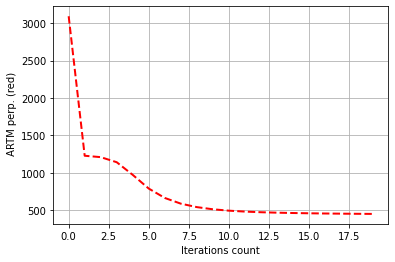

In [253]:
model_artm1.num_document_passes = 5
model_artm1.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=5)
print_measures(model_artm1)

Sparsity Phi: 0.000 ARTM)
Sparsity Theta: 0.002 (ARTM)
Kernel contrast: 0.214 (ARTM)
Kernel purity: 0.214 (ARTM)
Perplexity: 443.458 (ARTM)


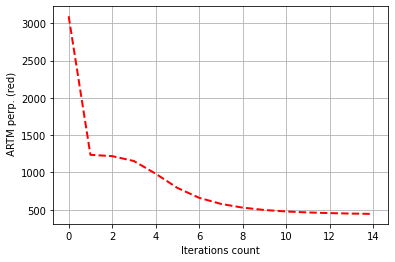

In [254]:
model_artm2.num_document_passes = 5
model_artm2.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=5)
print_measures(model_artm2)

Sparsity Phi: 0.000 ARTM)
Sparsity Theta: 0.001 (ARTM)
Kernel contrast: 0.200 (ARTM)
Kernel purity: 0.190 (ARTM)
Perplexity: 432.301 (ARTM)


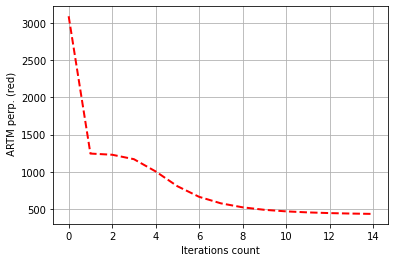

In [255]:
model_artm3.num_document_passes = 5
model_artm3.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=5)
print_measures(model_artm3)

In [262]:
model_artm3.regularizers.add(artm.SmoothSparsePhiRegularizer(name='SparsePhi', tau=-0.2, 
                                                            topic_names=['topic_{}'.format(i) for i in range(1, 300)], 
                                                            ), overwrite = True)
model_artm3.regularizers.add(artm.SmoothSparseThetaRegularizer(name='SparseTheta', tau=-0.2, 
                                                              topic_names=['topic_{}'.format(i) for i in range(1, 300)]), overwrite = True)

In [263]:
phi_tau = model_artm3.regularizers['SparsePhi'].tau
theta_tau = model_artm3.regularizers['SparseTheta'].tau

for i in range(10):
    model_artm3.regularizers['SparsePhi'].tau = (phi_tau + (phi_tau*0.6))
    model_artm3.regularizers['SparseTheta'].tau = (theta_tau + (theta_tau*0.2))
    
    model_artm3.fit_offline(batch_vectorizer=batch_vectorizer,num_collection_passes=1)

Изменение коэффициентов повлияло на перкплексию в лучшую сторону.

Sparsity Phi: 0.932 ARTM)
Sparsity Theta: 0.830 (ARTM)
Kernel contrast: 0.221 (ARTM)
Kernel purity: 0.317 (ARTM)
Perplexity: 358.608 (ARTM)


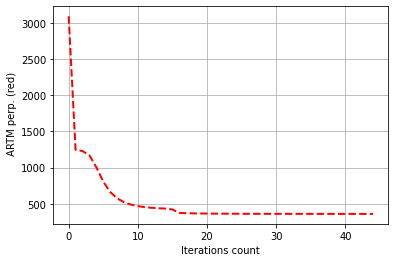

In [266]:
print_measures(model_artm3)

In [265]:
for topic_name in model_artm3.topic_names[:50]:
    print(topic_name + ': ')
    try:
        for x in model_artm.score_tracker['TopTokensScore_1'].last_tokens[topic_name]:
            print(x)
        print('---------')
    
    except KeyError:
        continue

topic_0: 
механизм
механический
viewmodel
мастер
instance
активация
войти
довестись
изменить
начальный_этап
---------
topic_1: 
безопасность
атака
защита
уязвимость
злоумышленник
угроза
хакер
информационный_безопасность
жертва
вредоносный
---------
topic_2: 
экран
ноутбук
дисплей
планшет
телевизор
разрешение
lenovo
ридер
монитор
подсветка
---------
topic_3: 
номер
звонок
карта
asterisk
шлюз
линия
номер_телефон
звонить
цифра
вызов
---------
topic_4: 
компьютер
intel
процессор
операционный
разработать
появиться
персональный_компьютер
вычислительный
процессор_intel
аппаратный
---------
topic_5: 
topic_6: 
стандарт
спецификация
поддерживать
беспроводный
диапазон
передача
технология
производитель
кодирование
поддерживаться
---------
topic_7: 
виртуальный
восстановление
резервный_копирование
резервный_копия
бэкап
виртуализация
среда
server
копия
физический
---------
topic_8: 
file
text_text
flag
флаг
получать
text
char
находить
import
адрес
---------
topic_9: 
topic_10: 
topic_11: 
хост
клас

3 самых хороших темы:

* операция, лазер, зрение, пациент, линза, роговица, хирург, разрез, оптический, коррекция
* признак, обучение, слой, нейронный_сеть, значение, параметр,нейрон, классификация, множество, машинный_обучение 
* безопасность, атака, защита, уязвимость, злоумышленник, угроза, хакер, информационный_безопасность, жертва, вредоносный

Параметры:
* количество тем - 300
* число проходов - 5
* число батчей - 1500 (при уменьшении показывает хуже результаты, при увеличении результаты не сильно меняются)
* threshold=0.3 у нграммера
* tau=-0.2


Количество тем было увеличено с 200 до 300. Наиболее подходящее количество тем оказалось 300. num_collection_passes менялoсь от 3 до 5, а количество проходов - от 1 до 5. При обоих параметрах, равных 5, перплексия у всех трех моделей была меньше всего. Показатель перплексии 432 является лучшим результатом на данном этапе. Можно приступить к регуляризаторам. Увеличим количество тем тут тоже до 300. tau было увеличено, но на конечный результат увеличение почти не повлияло. Перплексия после применения регуляризаторов уменьшилась до 358. 